# Tasks

1. Forecast model for number of antidiabetic drug prescription
2. Using a purely statistical SARIMA(X?) model
3. Comparing and evaluating against a baseline
4. Pipeline, deployment...


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union
 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot
import numpy as np
 
import warnings
warnings.filterwarnings('ignore')
 
%matplotlib inline

In [5]:
#Loading the dataset and checking the shape
df = pd.read_csv("AusAntidiabeticDrug.csv")
print(df.shape)

(204, 2)


Index(['ds', 'y'], dtype='object')

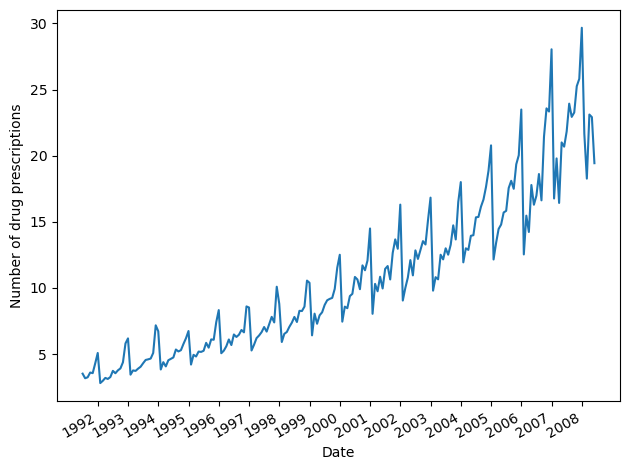

In [14]:
# Visualising

fig, ax = plt.subplots()

ax.plot(df.y)
ax.set_xlabel("Date")
ax.set_ylabel("Number of drug prescriptions")

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()

We see cyclical/seasonal components and a general upwards trend. This makes it perfect for our statistical forecast. But first we want to check individual components via **decomposition** so we can check individual aspects.

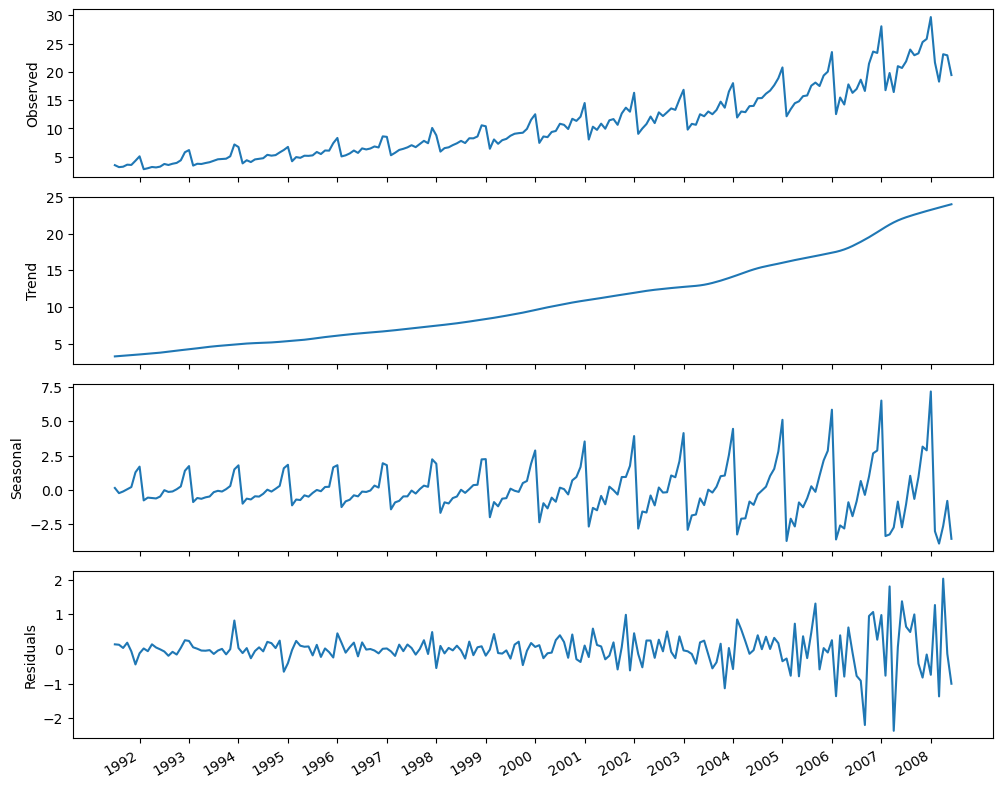

In [19]:
# seasonal_decompose would also work
decomp = STL(df.y, period=12).fit() 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(decomp.observed)
ax1.set_ylabel('Observed')
 
ax2.plot(decomp.trend)
ax2.set_ylabel('Trend')
 
ax3.plot(decomp.seasonal)
ax3.set_ylabel('Seasonal')
 
ax4.plot(decomp.resid)
ax4.set_ylabel('Residuals')
 
plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
 
fig.autofmt_xdate()
plt.tight_layout()

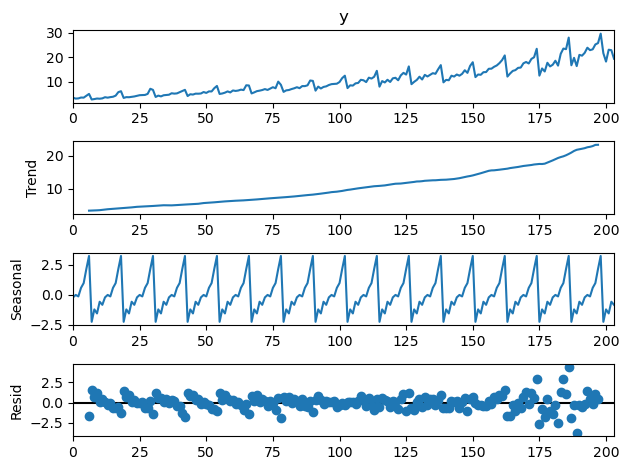

In [37]:
decomp2 = seasonal_decompose(df.y, period=12)
decomp2.plot()
pyplot.show()


As indicated, seasonality and trend make a good case for SARIMA. Since we don't have any exogenous variables (features), we don't need to work with SARIMAX